In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from astropy.io import fits as pf
from astropy.io import ascii
from decimal import Decimal

data_dir = 'Data'

bias1 = 'bias1.fits'
bias2 = 'bias2.fits'
bias3 = 'bias3.fits'
biaslist = [bias1,bias2,bias3]

n = np.zeros((2048,2048))

for i in biaslist:
    hdu = pf.open('%s/%s' %(data_dir,i))
#    print type(hdu)
#    print ' '
#    hdu.info()
    
    hdr = hdu[0].header
#    hdr
#    print ' '
    
    data = hdu[0].data
#    print data.shape
#    print type(data)
    print ' '
    print '%s Mean = %f' %(i,data.mean())
    print '%s Standard Deviation = %f' %(i,data.std())
    
    n = n + data
#    print n

print ' '
print 'Master Bias Mean = %f' %(n.mean())
print 'Master Bias Standard Deviation = %f' %(n.std())


 
bias1.fits Mean = 1912.469890
bias1.fits Standard Deviation = 6.018711
 
bias2.fits Mean = 1912.070399
bias2.fits Standard Deviation = 5.945882
 
bias3.fits Mean = 1911.677413
bias3.fits Standard Deviation = 5.065156
 
Master Bias Mean = 5736.217703
Master Bias Standard Deviation = 9.919083


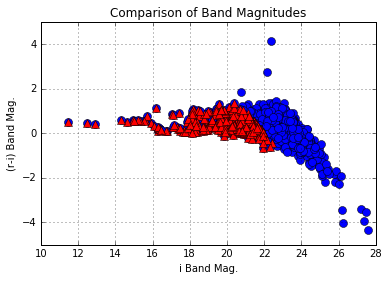

In [6]:
_r = '1608_p60_comb_r.cat'
_i = '1608_p60_comb_i.cat'

rcat = ascii.read('%s/%s' %(data_dir,_r))
icat = ascii.read('%s/%s' %(data_dir,_i))

rdata = rcat['MAG_AUTO'].data
idata = icat['MAG_AUTO'].data

rmag = []
imag = []

for x,y in zip(rdata,idata):
    if (x<50) & (y<50):
        rmag.append(x)
        imag.append(y)
        
rmag = np.array(rmag)
imag = np.array(imag)        
diffmag = rmag - imag

plt.clf()
plt.xlabel('i Band Mag.')
plt.ylabel('(r-i) Band Mag.')
plt.title('Comparison of Band Magnitudes')
plt.grid(True)
plt.plot(imag,diffmag,'bo',ms=8)

rmag2 = []
imag2 = []

for x,y in zip(rdata,idata):
    if (x<22):
        rmag2.append(x)
        imag2.append(y)
        
rmag2 = np.array(rmag2)
imag2 = np.array(imag2)
diff2 = rmag2 - imag2
plt.plot(imag2,diff2,'r^',ms=8)
plt.show()

45528
63402316984939347184690271394959412166656


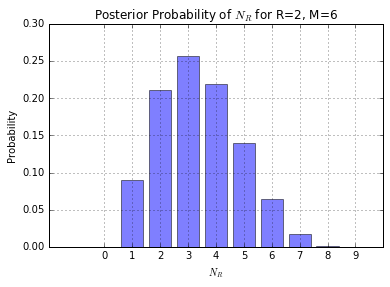

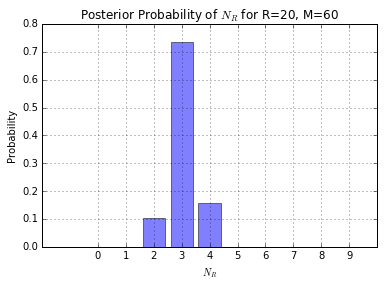

In [19]:
sum1 = 0
sum2 = 0
for i in range(0,10):
    sum1 = sum1 + i**2*(9-i)**4
    sum2 = sum2 + i**20*(9-i)**40
    
print sum1
print sum2
'%.2E' % Decimal(sum2)

x = np.arange(10)
y1 = (x**2. * (9-x)**4.)/sum1
y2 = (x**20. * (9-x)**40.)/sum2

plt.clf()
plt.grid(True)
plt.bar(x, y1, align='center', alpha=0.5)
plt.xticks(x)
plt.xlabel('$N_R$')
plt.ylabel('Probability')
plt.title('Posterior Probability of $N_R$ for R=2, M=6')
 
plt.show()

plt.clf()
plt.grid(True)
plt.bar(x, y2, align='center', alpha=0.5)
plt.xticks(x)
plt.xlabel('$N_R$')
plt.ylabel('Probability')
plt.title('Posterior Probability of $N_R$ for R=20, M=60')
 
plt.show()